<a href="https://colab.research.google.com/github/BlueHat358/Medical-Cost-using-Linear-Regression/blob/main/Copy_of_Medical_Cost_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [ ]:
!pip3 install -q kaggle # menginstall kaggle via pip

!mkdir -p "/root/.kaggle/"  # membuat folder .kaggle pada root
!cp "/content/drive/My Drive/DataSets/kaggle.json" "/root/.kaggle/" # mengcopy kaggle.json dari drive ke .kaggle di root
!chmod 600 /root/.kaggle/kaggle.json  # merubah hak akses kaggle.json

!kaggle datasets download -d mirichoi0218/insurance # mendownload datasets dari kaggle

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 30.3MB/s]


In [ ]:
local_zip = '/content/insurance.zip'  # inisialisasi file zip datasets
zip_ref = zipfile.ZipFile(local_zip, 'r') # inisialisasi zipfile dengan parameter lokasi datasets
zip_ref.extractall('/content/insurance')  # melakukan ekstraksi file
zip_ref.close() # menutup library zipfile

In [ ]:
list = pd.read_csv('/content/insurance/insurance.csv')  # membaca isi datasets yang berupa file csv dengan pandas

In [ ]:
list.describe() # menampilkan deskripsi dari datasets

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
list.info() # menampilkan informasi datasets seperti jumlah data, type data, kolom dan apakah terdapat null atau tidak

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(list.head(10))  # menampilkan isi datasets dari paling atas berjumlah 10

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [ ]:
age = list.age.unique() # mengambil data unik atau mengabaikan data yang sama
sex = list.sex.unique() # mengambil data unik atau mengabaikan data yang sama
smoker = list.smoker.unique() # mengambil data unik atau mengabaikan data yang sama
regions = list.region.unique()  # mengambil data unik atau mengabaikan data yang sama

print(age)  # menampilkan isi variabel
print(sex)  # menampilkan isi variabel
print(smoker) # menampilkan isi variabel
print(regions)  # menampilkan isi variabel

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
list['sex'].replace(['female', 'male'], [0,1], inplace=True)  # melakukan prepocessing, merubah teks menjadi angka
list['smoker'].replace(['yes', 'no'], [1,0], inplace=True)  # melakukan prepocessing, merubah teks menjadi angka
list['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], [1,2,3,4], inplace=True) # melakukan prepocessing, merubah teks menjadi angka

In [ ]:
print(list.head(10))  # menampilkan isi datasets setelah dilakukan prepocessing

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       1  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       3  21984.47061
4   32    1  28.880         0       0       3   3866.85520
5   31    0  25.740         0       0       2   3756.62160
6   46    0  33.440         1       0       2   8240.58960
7   37    0  27.740         3       0       3   7281.50560
8   37    1  29.830         2       0       4   6406.41070
9   60    0  25.840         0       0       3  28923.13692


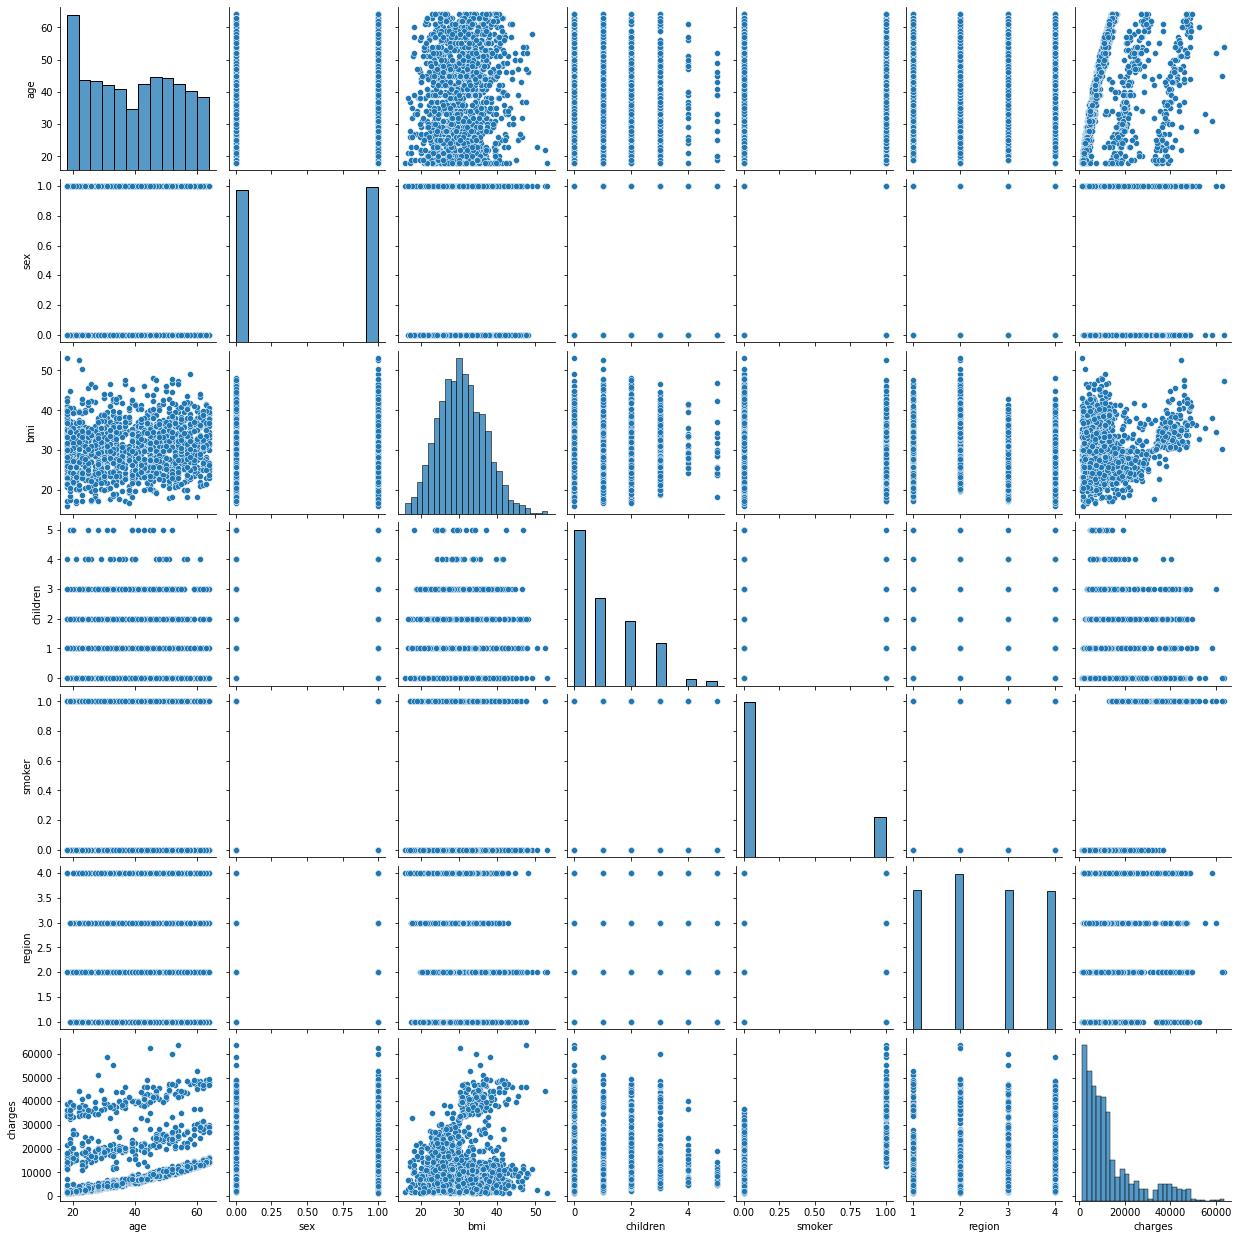

In [ ]:
sns.pairplot(list)  # menampilkan hubungan setiap feature yang digambarkan dengan grafik dengan menggunakan library seaborn

In [ ]:
x = list[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] # memisahkan feature, mengambil feature yang memiliki hubungan dengan feature yang akan dicari
y = list['charges'] # memisahkan feature, mengambil feature yang akan dicari

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=40) # membagi datasets menjadi data train dan test dengan test 33%

In [ ]:
reg = ['southwest', 'southeast', 'northwest', 'northeast']  # inisialisasi region
model = LinearRegression()  # instansi library LinearRegression
model.fit(X_train, y_train) # melakukan training
y_test_pred = model.predict(X_test) # melakukan prediksi datasets test dengan model yang telah ditraining

             coefisien
age         262.242478
sex          53.846270
bmi         329.433890
children    602.109484
smoker    23995.279598
region      228.089699 

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019 -0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185 -0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750 -0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673 -0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.002181  0.787251
region   -0.002127 -0.004588 -0.157566 -0.016569  0.002181  1.000000  0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.006208  1.000000 

Mean Square Error:  37506425.61599823 

R-Square:  0.7225484898112424 



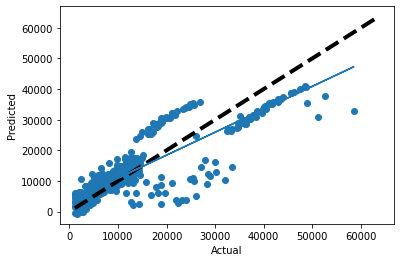

In [ ]:
coef_feature = pd.DataFrame(model.coef_, x.columns, columns=['coefisien'])  # mencari koefisien dari feature model yang telah ditraining
print(coef_feature,'\n')  # menampilkan hasil koefisien setiap feature

corr_metrics = list.corr()  # mencari korelasi antar feature
print(corr_metrics,'\n')  # menampilkan korelasi antar feature

print("Mean Square Error: ", mse(y_test, y_test_pred),'\n') # menghitung mean square error

print("R-Square: ", model.score(X_test, y_test),'\n') # menghitung R-Square

fig, ax = plt.subplots()  # membuat figure
ax.scatter(y_test, y_test_pred) # membuat pola titik pada feature yang diprediksi dengan feature data asli
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # membuat plot garis tengah
ax.set_xlabel('Actual') # membuat x label
ax.set_ylabel('Predicted')  # membuat y label

y_test_arr = np.asarray(y_test) # membuat feature asli menjadi array dengan library numpy
y_test_pred_arr = np.asarray(y_test_pred) # membuat feature prediksi menjadi array dengan library numpy
y_test_arr, y_test_pred_arr = y_test_arr.reshape(-1,1), y_test_pred_arr.reshape(-1,1)   # membentuk ulang bentuk array (baris dan kolom)
ax.plot(y_test_arr, LinearRegression().fit(y_test_arr, y_test_pred_arr).predict(y_test_arr))  # membuat plot hasil prediksi dengan linear regression

plt.show() # menampilkan plot

In [ ]:
def bmi_calculator(height, weight): # membuat function yang berguna untuk menghitung bmi dengan inputan tinggi dan berat badan
  return weight/pow(height/100,2) # mengembalikan value berupa angka bmi

def test_predict(): # membuat function yang berguna untuk membandingkan data asli dengan data prediksi
  list_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  # mengmbil feature data asli dan data prediksi
  return list_pred  # mengembalikan hasil pengambilan data

def predict_price(age, sex, children, smoker, region, height, weight):  # membuat function yang berguna untuk melakukan prediksi dengan inputan manual
  index = 0 # inisialisasi index
  
  if sex == 'female': # percabangan jika sex adalah female
    sex = 0 # maka sex akan dirubah menjadi 0
  else: # jika salah
    sex = 1 # maka sex diganti dengan 1
  
  if smoker == 'yes': # percabangan smoker jika yes
    smoker = 1  # maka smoker akan dirubah menjadi 1
  else: # jika salah
    smoker = 0  # smoker dirubah menjadi 0

  for i in reg: # melakukan perulangan sejumlah data pada array reg
    if region == i: # jika region inputan sama dengan region perulangan
      region = index  # maka region akan dirubah menjadi angka sesuai dengan index
      break # menghentikan proses perulangan
    index += 1  # melakukan increment index

  return model.predict([[age, sex, bmi_calculator(height, weight), children, smoker, region]])  # mengembalikan hasil prediksi

In [ ]:
print(test_predict().head(10))  # memanggil function dan menampilkan hasil kembalian

print("\nPredict Cost: ",predict_price(20, 'male', 0, 1, 'southeast', 170, 82)) # melakukan prediksi manual dengan memanggil function dan menampilkannya

           Actual     Predicted
1099   3227.12110   5610.453633
759   36307.79830  28598.806332
215    7371.77200  11204.892457
903    8125.78450  12298.190805
989   14571.89080  24760.086170
154    7077.18940   7190.199114
56    13607.36875  14609.519904
638   20149.32290  30687.935215
1144   9630.39700  12037.638354
85    21098.55405  32079.559227

Predict Cost:  [1672.68957387]
